In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('train.csv')

In [3]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_dataset.shape

(614, 13)

In [5]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_dataset['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [9]:
# Quality
# Gender has nan values
# Married has nan values
# Dependents has nan values and 3+ values
# Self_Employed has nan values
# LoanAmount has nan values
# LoanAmountTerm has nan values
# Credit_History has nan values

In [10]:
loan_dataset['Gender'].fillna(value=loan_dataset['Gender'].mode()[0],inplace=True)
loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0],inplace= True)
loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0],inplace= True)
loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0],inplace= True)
loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mode()[0],inplace=True)
loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mode()[0],inplace=True)
loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].median(),inplace=True)

In [11]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
loan_dataset.shape

(614, 13)

### Data Visulizations

In [13]:
loan_dataset['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

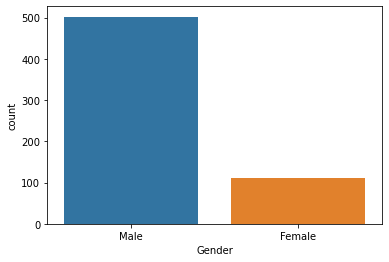

In [14]:
sns.countplot(x='Gender', data=loan_dataset)

In [15]:
print('Percentage of Male and Female Applicants')
maleCount=len(loan_dataset[loan_dataset['Gender']=='Male'])
femaleCount=len(loan_dataset[loan_dataset['Gender']=='Female'])

print("Percentage of Male applicant: {:.2f}%".format((maleCount / (len(loan_dataset.Gender))*100)))
print("Percentage of Female Applicatns: {:.2f}%".format((femaleCount/(len(loan_dataset.Gender))*100)))

Percentage of Male and Female Applicants
Percentage of Male applicant: 81.76%
Percentage of Female Applicatns: 18.24%


In [16]:
loan_dataset['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

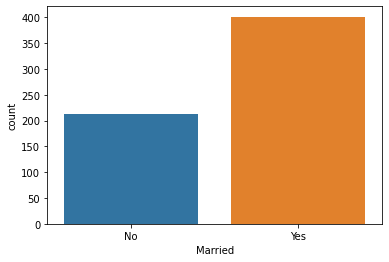

In [17]:
sns.countplot(x='Married', data=loan_dataset)

In [18]:
print('Percentage of Married and Unmarried Applicants')
marriedCount=len(loan_dataset[loan_dataset['Married']=='Yes'])
unmarriedCount=len(loan_dataset[loan_dataset['Married']=='No'])

print("Percentage of Married applicant: {:.2f}%".format((marriedCount / (len(loan_dataset.Married))*100)))
print("Percentage of Unmarried Applicatns: {:.2f}%".format((unmarriedCount/(len(loan_dataset.Married))*100)))

Percentage of Married and Unmarried Applicants
Percentage of Married applicant: 65.31%
Percentage of Unmarried Applicatns: 34.69%


In [19]:
loan_dataset['Dependents']=loan_dataset['Dependents'].replace(to_replace='3+', value=4)

In [20]:
loan_dataset['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

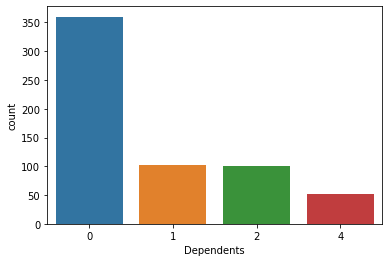

In [21]:
sns.countplot(x='Dependents', data=loan_dataset)

In [22]:
loan_dataset['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

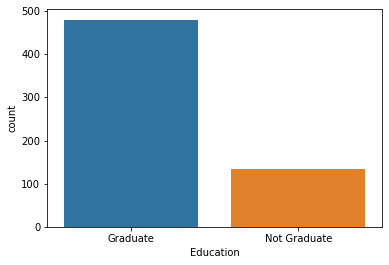

In [23]:
sns.countplot('Education', data=loan_dataset)

In [24]:
print('Percent of Educated Application')
graduateApplicant=len(loan_dataset[loan_dataset['Education']=='Graduate'])
notgraduateApplicant=len(loan_dataset[loan_dataset['Education']=='Not Graduate'])

print('Percent of Graduated Application: {:.2f}%'.format((graduateApplicant / (len(loan_dataset.Education))*100)))
print('Percent of Not Educated Application: {:.2f}%'.format((notgraduateApplicant / (len(loan_dataset.Education))*100)))

Percent of Educated Application
Percent of Graduated Application: 78.18%
Percent of Not Educated Application: 21.82%


In [25]:
loan_dataset['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

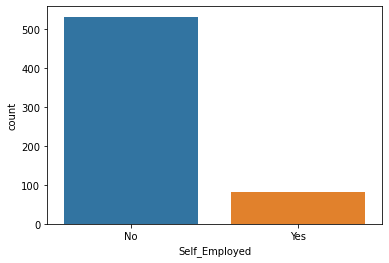

In [26]:
sns.countplot('Self_Employed', data=loan_dataset)

In [27]:
print('Percent of Self Employed Application')
selfApplicant=len(loan_dataset[loan_dataset['Self_Employed']=='Yes'])
notselfApplicant=len(loan_dataset[loan_dataset['Self_Employed']=='No'])

print('Percent of Self Employed Application: {:.2f}%'.format((selfApplicant / (len(loan_dataset.Self_Employed))*100)))
print('Percent of Not Self Employed Application: {:.2f}%'.format((notselfApplicant / (len(loan_dataset.Self_Employed))*100)))

Percent of Self Employed Application
Percent of Self Employed Application: 13.36%
Percent of Not Self Employed Application: 86.64%


In [28]:
loan_dataset['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

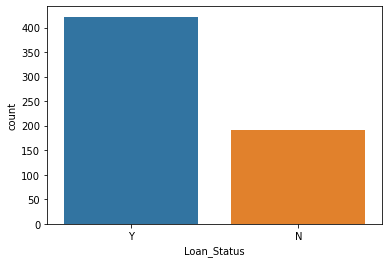

In [29]:
sns.countplot('Loan_Status', data=loan_dataset)

In [30]:
countY = len(loan_dataset[loan_dataset.Loan_Status == 'Y'])
countN = len(loan_dataset[loan_dataset.Loan_Status == 'N'])

print("Percentage of Approved: {:.2f}%".format((countY / (len(loan_dataset.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(loan_dataset.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%


In [31]:
loan_dataset['ApplicantIncome'].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

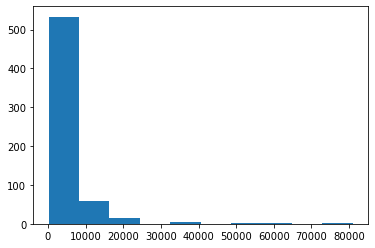

In [32]:
plt.hist(loan_dataset['ApplicantIncome'])
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

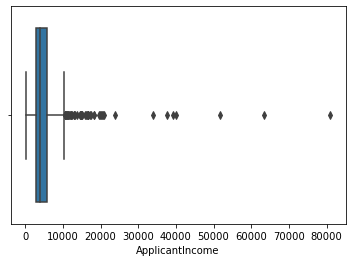

In [33]:
sns.boxplot(loan_dataset['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

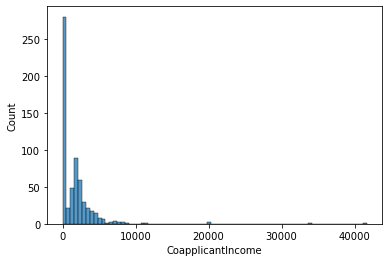

In [34]:
sns.histplot(loan_dataset['CoapplicantIncome'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

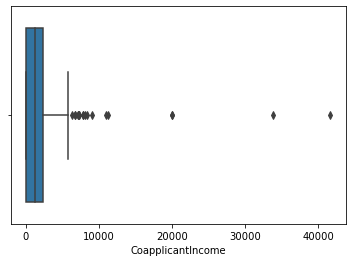

In [35]:
sns.boxplot(loan_dataset['CoapplicantIncome'])

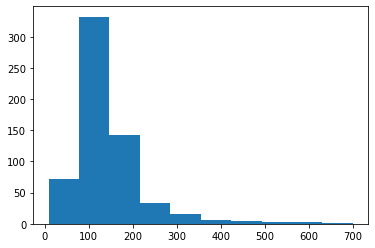

In [36]:
plt.hist(loan_dataset['LoanAmount'])
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

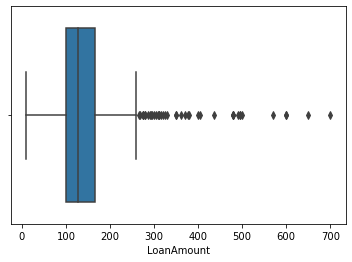

In [37]:
sns.boxplot(loan_dataset['LoanAmount'])

In [38]:
loan_dataset['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

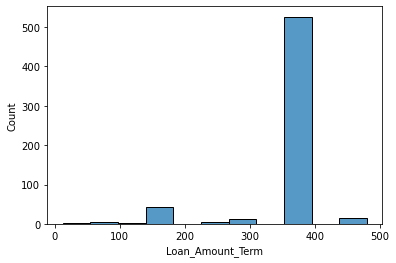

In [39]:
sns.histplot(loan_dataset['Loan_Amount_Term'])

In [40]:
loan_dataset['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

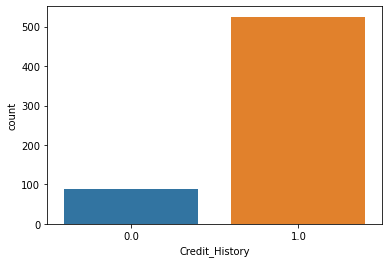

In [41]:
sns.countplot('Credit_History', data=loan_dataset)

In [42]:
loan_dataset['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

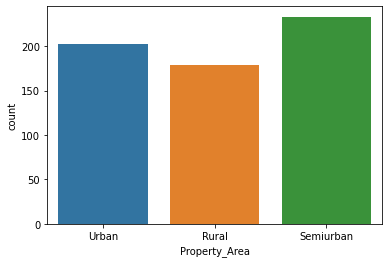

In [43]:
sns.countplot('Property_Area', data=loan_dataset)

<AxesSubplot:xlabel='Education', ylabel='count'>

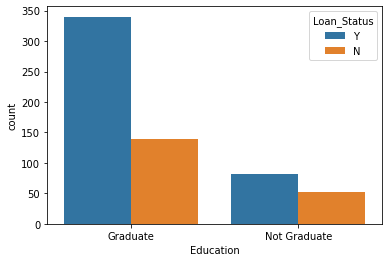

In [44]:
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)

<AxesSubplot:xlabel='Gender', ylabel='count'>

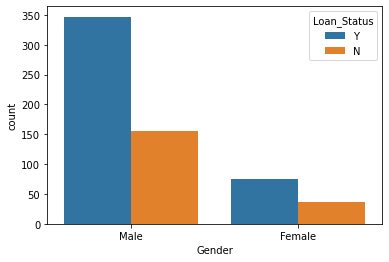

In [45]:
sns.countplot(x='Gender', hue='Loan_Status', data=loan_dataset)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

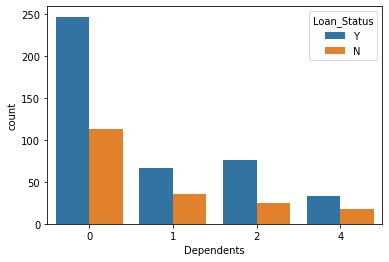

In [46]:
sns.countplot(x='Dependents', hue='Loan_Status', data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

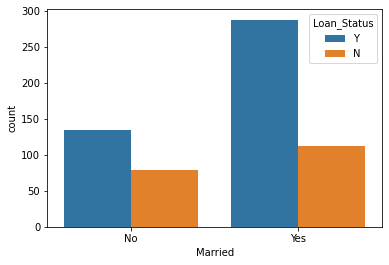

In [47]:
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

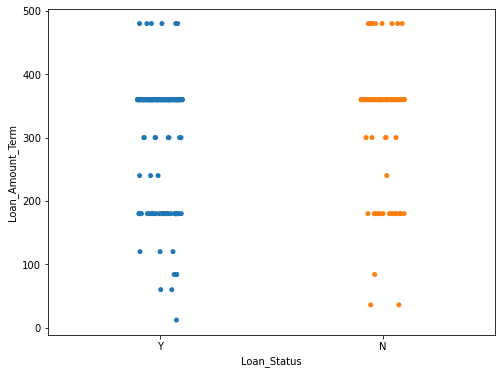

In [48]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Loan_Status',y='Loan_Amount_Term',data=loan_dataset)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

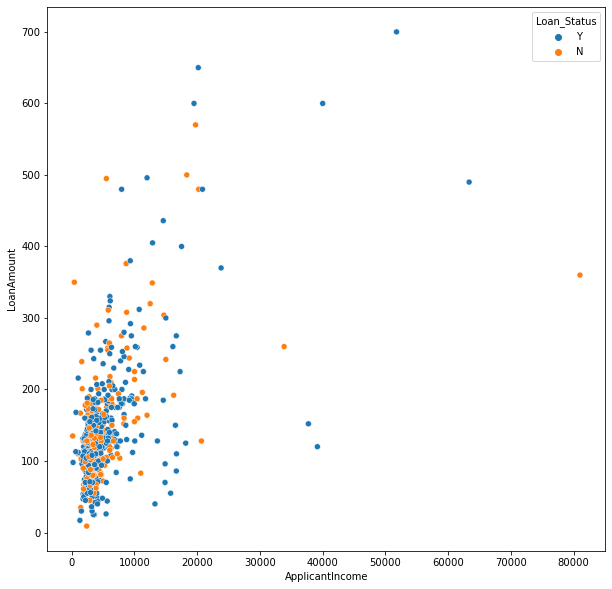

In [49]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=loan_dataset,hue='Loan_Status')

In [50]:
loan_dataset.groupby('Gender')['ApplicantIncome'].mean()

Gender
Female    4643.473214
Male      5573.017928
Name: ApplicantIncome, dtype: float64

### convert categorical columns to numerical values

In [51]:
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [52]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y


In [53]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

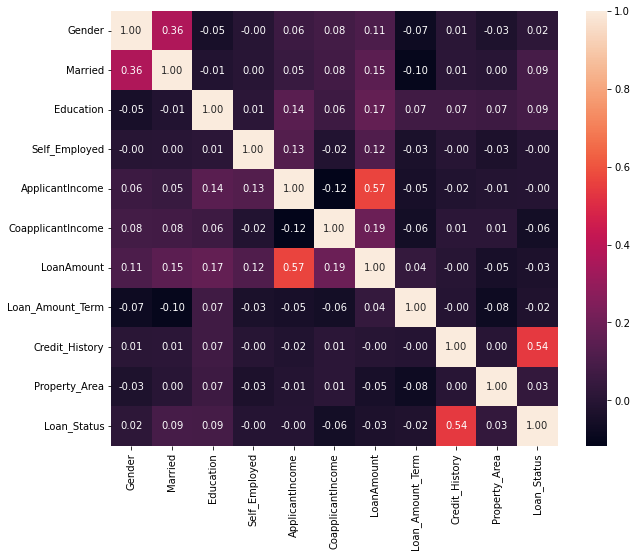

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(loan_dataset.corr(), annot=True, fmt='.2f')
plt.show()

### Label Encoder

In [55]:
#col=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Status']

#le= LabelEncoder()

#for cols in col:
#    loan_dataset[col]=le.fit_transform(loan_dataset[col])

In [56]:
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [57]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

### Training and Testing Model

In [58]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

### Support Vector Machine Model

In [59]:
classifier=SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

### Model Evaluation

In [60]:
y_pred=classifier.predict(X_test)

In [61]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [62]:
# accuracy score on training data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)
print('Accuracy of the Model : ', accuracy)

Accuracy of the Model :  0.8064516129032258


In [63]:
class_report=classification_report(y_pred, Y_test)

In [64]:
print(class_report)

              precision    recall  f1-score   support

           0       0.47      0.82      0.60        11
           1       0.95      0.80      0.87        51

    accuracy                           0.81        62
   macro avg       0.71      0.81      0.74        62
weighted avg       0.87      0.81      0.82        62



### Logistic Regression

In [65]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)
# accuracy score on training data
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)
print('Accuracy of the Model : ', accuracy)

Accuracy of the Model :  0.7741935483870968


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN Classifier

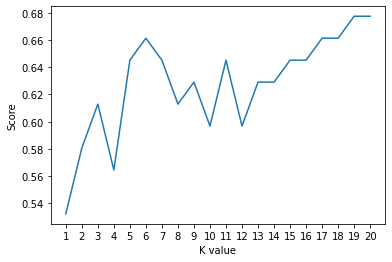

KNN best accuracy: 67.74%


In [66]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, Y_train)
    scoreListknn.append(KNclassifier.score(X_test, Y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

### Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

#### Gaussian Naive Bayes

In [68]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
y_pred=gnb.predict(X_test)
# accuracy score on training data
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)
print('Accuracy of the Model : ', accuracy)

Accuracy of the Model :  0.7741935483870968


### Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred=dt.predict(X_test)
# accuracy score on training data
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)
print('Accuracy of the Model : ', accuracy)

Accuracy of the Model :  0.6935483870967742


### Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
# accuracy score on training data
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)
print('Accuracy of the Model : ', accuracy)

Accuracy of the Model :  0.7903225806451613


### Prediction Model

In [72]:
# Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
# 1, 1, 1, 1, 0, 4583, 1508.0, 128.0, 360.0,1.0, 0
# 1, 1, 1, 1, 0, 5849, 0, 
1,0	0,1,0,5849,0.0,128.0,360.0,1.0,2
loan_dataset.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0


In [75]:
input_data = (1,1,1,1,0,4583, 1508, 128, 360, 1, 0)
input_data1=(1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data1)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Loan Request Denied')
else:
  print('Loan Request Approved')

[1]
Loan Request Approved


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### Pickle Model

In [76]:
import pickle

In [78]:
pickle.dump(classifier, open('model.pkl', 'wb'))